In [44]:
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
import random
from mpl_toolkits.mplot3d import Axes3D
from bs4 import BeautifulSoup
import urllib
import json
import pprint
import csv
from _io import TextIOWrapper
import requests
from datetime import datetime
import scipy as sp
import pandas as pd
import sklearn as sk
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import os
import sys
%matplotlib inline

<h3>Read csv file from computer to view contents</h3>

In [101]:
location = r'/Users/Annamira/Documents/wunderground_csvs/BackBay2.csv' 
DF = pd.read_csv(location, engine='python')
DF

EmptyDataError: No columns to parse from file

<h3>Define variables and lists needed for data cleaning</h3>

In [55]:
'''
for each station:
    for day in week:
        for each hour in day:
            write row
'''

stations = {'BackBay': 'KMABOSTO278', 'Logan': 'KBOS',
                'Dorchester': 'KMABOSTO268',
                'ChestnutHill': 'KMABROOK7', 'CambridgePort': 'KMACAMBR4',
                'Belmont': 'KMABELMO12', 'Malden': 'KMAMALDE6',
                'Medford': 'KMAMEDFO4', 'Waban': 'KMAWABAN1'}

station_keys = stations.keys()

day_folders = ['7-7', '7-8', '7-9', '7-10', '7-11', '7-12',
               '7-13', '7-14', '7-15']

day7 = os.listdir('../../wunderground_data/7-7')
day8 = os.listdir('../../wunderground_data/7-8')
day9 = os.listdir('../../wunderground_data/7-9')
day10 = os.listdir('../../wunderground_data/7-10')
day11 = os.listdir('../../wunderground_data/7-11')
day12 = os.listdir('../../wunderground_data/7-12')
day13 = os.listdir('../../wunderground_data/7-13')
day14 = os.listdir('../../wunderground_data/7-14')
day15 = os.listdir('../../wunderground_data/7-15')

day7 = day7[1:]

days = [day7, day8, day9, day10, day11, day12, day13, day14, day15]

with open('../../wunderground_data/7-7/day_07-07_14-12.json', 'r') as file:
    data = json.load(file)
hour_key = list(data.keys())[0]

observation = data[hour_key]['BackBay']['current_observation']
header = list(observation.keys())

header[4] = 'latitude'
header[5] = 'longitude'



<h3>Run code to create data csv files seperated by sensor location</h3>

In [102]:

for station in station_keys:
    
    # open new file for current station's data
    file = open('/Users/Annamira/Documents/wunderground_csvs/' + station +'.csv', 'w')
    
    # create the csv writer object
    csvwriter = csv.writer(file)
    
    csvwriter.writerow(header)
    
    for day in range(0, 9):
        
        for hour in days[day]:
            
            filepath = '../../wunderground_data/' + day_folders[day] + '/' + hour
            
            with open(filepath, 'r') as file:
                 data = json.load(file)
            
            hour_key = list(data.keys())[0]
            
            print(hour_key)
            
            try:
                obs = data[hour_key][station]['current_observation']
            except KeyError:
                print("Oops! " + station + "'s sensor was off, no observation to read.")
            
            values = list(obs.values())
            
            print(values)
            
            lat = values[2].get('latitude')
            lon = values[2].get('longitude')
            values[4] = lat
            values[5] = lon

            csvwriter.writerow(values)

    

07-07_15-00
[{'url': 'http://icons.wxug.com/graphics/wu2/logo_130x80.png', 'title': 'Weather Underground', 'link': 'http://www.wunderground.com'}, {'full': 'Boston, MA', 'city': 'Boston', 'state': 'MA', 'state_name': 'Massachusetts', 'country': 'US', 'country_iso3166': 'US', 'zip': '02199', 'magic': '1', 'wmo': '99999', 'latitude': '42.348248', 'longitude': '-71.084167', 'elevation': '5.8'}, {'full': 'Back Bay, Boston, Massachusetts', 'city': 'Back Bay, Boston', 'state': 'Massachusetts', 'country': '', 'country_iso3166': 'US', 'latitude': '42.348248', 'longitude': '-71.084167', 'elevation': '10 ft'}, {}, 'KMABOSTO278', 'Last Updated on July 7, 10:59 AM EDT', 'Fri, 07 Jul 2017 10:59:20 -0400', '1499439560', 'Fri, 07 Jul 2017 10:59:51 -0400', '1499439591', 'EDT', 'America/New_York', '-0400', 'Overcast', '72.1 F (22.3 C)', 72.1, 22.3, '70%', 'From the South at 1.8 MPH Gusting to 4.9 MPH', 'South', 169, 1.8, '4.9', 2.9, '7.9', '1011', '29.86', '-', '61.9 F (16.6 C)', 61.9, 16.6, 'NA', 'NA'

07-09_02-00
[{'url': 'http://icons.wxug.com/graphics/wu2/logo_130x80.png', 'title': 'Weather Underground', 'link': 'http://www.wunderground.com'}, {'full': 'Boston, MA', 'city': 'Boston', 'state': 'MA', 'state_name': 'Massachusetts', 'country': 'US', 'country_iso3166': 'US', 'zip': '02199', 'magic': '1', 'wmo': '99999', 'latitude': '42.348248', 'longitude': '-71.084167', 'elevation': '5.8'}, {'full': 'Back Bay, Boston, Massachusetts', 'city': 'Back Bay, Boston', 'state': 'Massachusetts', 'country': '', 'country_iso3166': 'US', 'latitude': '42.348248', 'longitude': '-71.084167', 'elevation': '10 ft'}, {}, 'KMABOSTO278', 'Last Updated on July 8, 9:59 PM EDT', 'Sat, 08 Jul 2017 21:59:40 -0400', '1499565580', 'Sat, 08 Jul 2017 21:59:50 -0400', '1499565590', 'EDT', 'America/New_York', '-0400', 'Overcast', '70.7 F (21.5 C)', 70.7, 21.5, '86%', 'Calm', 'SW', 230, 0.0, 0, 0, 0, '1007', '29.74', '+', '66.4 F (19.1 C)', 66.4, 19.1, 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', '70.7 F (21.5 C)', '70.7', '

07-10_07-00
[{'url': 'http://icons.wxug.com/graphics/wu2/logo_130x80.png', 'title': 'Weather Underground', 'link': 'http://www.wunderground.com'}, {'full': 'Boston, MA', 'city': 'Boston', 'state': 'MA', 'state_name': 'Massachusetts', 'country': 'US', 'country_iso3166': 'US', 'zip': '02199', 'magic': '1', 'wmo': '99999', 'latitude': '42.348248', 'longitude': '-71.084167', 'elevation': '5.8'}, {'full': 'Back Bay, Boston, Massachusetts', 'city': 'Back Bay, Boston', 'state': 'Massachusetts', 'country': '', 'country_iso3166': 'US', 'latitude': '42.348248', 'longitude': '-71.084167', 'elevation': '10 ft'}, {}, 'KMABOSTO278', 'Last Updated on July 10, 2:59 AM EDT', 'Mon, 10 Jul 2017 02:59:28 -0400', '1499669968', 'Mon, 10 Jul 2017 02:59:50 -0400', '1499669990', 'EDT', 'America/New_York', '-0400', 'Clear', '70.0 F (21.1 C)', 70.0, 21.1, '53%', 'Calm', 'SW', 224, 0.9, '2.5', 1.4, '4.0', '1016', '30.02', '+', '52.2 F (11.2 C)', 52.2, 11.2, 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', '70.0 F (21.1 C)', '

07-11_12-00
[{'url': 'http://icons.wxug.com/graphics/wu2/logo_130x80.png', 'title': 'Weather Underground', 'link': 'http://www.wunderground.com'}, {'full': 'Boston, MA', 'city': 'Boston', 'state': 'MA', 'state_name': 'Massachusetts', 'country': 'US', 'country_iso3166': 'US', 'zip': '02199', 'magic': '1', 'wmo': '99999', 'latitude': '42.348248', 'longitude': '-71.084167', 'elevation': '5.8'}, {'full': 'Back Bay, Boston, Massachusetts', 'city': 'Back Bay, Boston', 'state': 'Massachusetts', 'country': '', 'country_iso3166': 'US', 'latitude': '42.348248', 'longitude': '-71.084167', 'elevation': '10 ft'}, {}, 'KMABOSTO278', 'Last Updated on July 11, 7:59 AM EDT', 'Tue, 11 Jul 2017 07:59:47 -0400', '1499774387', 'Tue, 11 Jul 2017 07:59:50 -0400', '1499774390', 'EDT', 'America/New_York', '-0400', 'Overcast', '68.2 F (20.1 C)', 68.2, 20.1, '91%', 'From the West at 6.7 MPH Gusting to 9.8 MPH', 'West', 262, 6.7, '9.8', 10.8, '15.8', '1014', '29.96', '0', '65.5 F (18.6 C)', 65.5, 18.6, 'NA', 'NA'

07-12_15-00
[{'url': 'http://icons.wxug.com/graphics/wu2/logo_130x80.png', 'title': 'Weather Underground', 'link': 'http://www.wunderground.com'}, {'full': 'Boston, MA', 'city': 'Boston', 'state': 'MA', 'state_name': 'Massachusetts', 'country': 'US', 'country_iso3166': 'US', 'zip': '02199', 'magic': '1', 'wmo': '99999', 'latitude': '42.348248', 'longitude': '-71.084167', 'elevation': '5.8'}, {'full': 'Back Bay, Boston, Massachusetts', 'city': 'Back Bay, Boston', 'state': 'Massachusetts', 'country': '', 'country_iso3166': 'US', 'latitude': '42.348248', 'longitude': '-71.084167', 'elevation': '10 ft'}, {}, 'KMABOSTO278', 'Last Updated on July 12, 10:59 AM EDT', 'Wed, 12 Jul 2017 10:59:18 -0400', '1499871558', 'Wed, 12 Jul 2017 10:59:49 -0400', '1499871589', 'EDT', 'America/New_York', '-0400', 'Mostly Cloudy', '84.2 F (29.0 C)', 84.2, 29.0, '54%', 'From the WSW at 3.6 MPH Gusting to 4.9 MPH', 'WSW', 242, 3.6, '4.9', 5.8, '7.9', '1015', '29.97', '-', '65.8 F (18.8 C)', 65.8, 18.8, '86 F (3

07-15_03-00
[{'url': 'http://icons.wxug.com/graphics/wu2/logo_130x80.png', 'title': 'Weather Underground', 'link': 'http://www.wunderground.com'}, {'full': 'Boston, MA', 'city': 'Boston', 'state': 'MA', 'state_name': 'Massachusetts', 'country': 'US', 'country_iso3166': 'US', 'zip': '02199', 'magic': '1', 'wmo': '99999', 'latitude': '42.348248', 'longitude': '-71.084167', 'elevation': '5.8'}, {'full': 'Back Bay, Boston, Massachusetts', 'city': 'Back Bay, Boston', 'state': 'Massachusetts', 'country': 'US', 'country_iso3166': 'US', 'latitude': '42.348248', 'longitude': '-71.084167', 'elevation': '10 ft'}, {}, 'KMABOSTO278', 'Last Updated on July 12, 6:27 PM EDT', 'Wed, 12 Jul 2017 18:27:50 -0400', '1499898470', 'Fri, 14 Jul 2017 22:59:48 -0400', '1500087588', 'EDT', 'America/New_York', '-0400', 'Overcast', '78.4 F (25.8 C)', 78.4, 25.8, '80%', 'Calm', 'SW', 225, 0.0, 0, 0, 0, '1017', '30.03', '-', '72 F (22 C)', 72, 22, '81 F (27 C)', 81, 27, 'NA', 'NA', 'NA', '81 F (27 C)', '81', '27', '

07-08_08-00
Oops! Logan's sensor was off, no observation to read.
[{'url': 'http://icons.wxug.com/graphics/wu2/logo_130x80.png', 'title': 'Weather Underground', 'link': 'http://www.wunderground.com'}, {'full': 'Boston, MA', 'city': 'Boston', 'state': 'MA', 'state_name': 'Massachusetts', 'country': 'US', 'country_iso3166': 'US', 'zip': '02199', 'magic': '1', 'wmo': '99999', 'latitude': '42.348248', 'longitude': '-71.084167', 'elevation': '5.8'}, {'full': 'Back Bay, Boston, Massachusetts', 'city': 'Back Bay, Boston', 'state': 'Massachusetts', 'country': 'US', 'country_iso3166': 'US', 'latitude': '42.348248', 'longitude': '-71.084167', 'elevation': '10 ft'}, {}, 'KMABOSTO278', 'Last Updated on July 12, 6:27 PM EDT', 'Wed, 12 Jul 2017 18:27:50 -0400', '1499898470', 'Sat, 15 Jul 2017 15:59:48 -0400', '1500148788', 'EDT', 'America/New_York', '-0400', 'Partly Cloudy', '78.4 F (25.8 C)', 78.4, 25.8, '80%', 'Calm', 'SW', 225, 0.0, 0, 0, 0, '1011', '29.86', '-', '72 F (22 C)', 72, 22, '81 F (27 

07-10_11-00
Oops! Logan's sensor was off, no observation to read.
[{'url': 'http://icons.wxug.com/graphics/wu2/logo_130x80.png', 'title': 'Weather Underground', 'link': 'http://www.wunderground.com'}, {'full': 'Boston, MA', 'city': 'Boston', 'state': 'MA', 'state_name': 'Massachusetts', 'country': 'US', 'country_iso3166': 'US', 'zip': '02199', 'magic': '1', 'wmo': '99999', 'latitude': '42.348248', 'longitude': '-71.084167', 'elevation': '5.8'}, {'full': 'Back Bay, Boston, Massachusetts', 'city': 'Back Bay, Boston', 'state': 'Massachusetts', 'country': 'US', 'country_iso3166': 'US', 'latitude': '42.348248', 'longitude': '-71.084167', 'elevation': '10 ft'}, {}, 'KMABOSTO278', 'Last Updated on July 12, 6:27 PM EDT', 'Wed, 12 Jul 2017 18:27:50 -0400', '1499898470', 'Sat, 15 Jul 2017 15:59:48 -0400', '1500148788', 'EDT', 'America/New_York', '-0400', 'Partly Cloudy', '78.4 F (25.8 C)', 78.4, 25.8, '80%', 'Calm', 'SW', 225, 0.0, 0, 0, 0, '1011', '29.86', '-', '72 F (22 C)', 72, 22, '81 F (27 

07-11_23-00
Oops! Logan's sensor was off, no observation to read.
[{'url': 'http://icons.wxug.com/graphics/wu2/logo_130x80.png', 'title': 'Weather Underground', 'link': 'http://www.wunderground.com'}, {'full': 'Boston, MA', 'city': 'Boston', 'state': 'MA', 'state_name': 'Massachusetts', 'country': 'US', 'country_iso3166': 'US', 'zip': '02199', 'magic': '1', 'wmo': '99999', 'latitude': '42.348248', 'longitude': '-71.084167', 'elevation': '5.8'}, {'full': 'Back Bay, Boston, Massachusetts', 'city': 'Back Bay, Boston', 'state': 'Massachusetts', 'country': 'US', 'country_iso3166': 'US', 'latitude': '42.348248', 'longitude': '-71.084167', 'elevation': '10 ft'}, {}, 'KMABOSTO278', 'Last Updated on July 12, 6:27 PM EDT', 'Wed, 12 Jul 2017 18:27:50 -0400', '1499898470', 'Sat, 15 Jul 2017 15:59:48 -0400', '1500148788', 'EDT', 'America/New_York', '-0400', 'Partly Cloudy', '78.4 F (25.8 C)', 78.4, 25.8, '80%', 'Calm', 'SW', 225, 0.0, 0, 0, 0, '1011', '29.86', '-', '72 F (22 C)', 72, 22, '81 F (27 

07-14_22-00
Oops! Logan's sensor was off, no observation to read.
[{'url': 'http://icons.wxug.com/graphics/wu2/logo_130x80.png', 'title': 'Weather Underground', 'link': 'http://www.wunderground.com'}, {'full': 'Boston, MA', 'city': 'Boston', 'state': 'MA', 'state_name': 'Massachusetts', 'country': 'US', 'country_iso3166': 'US', 'zip': '02199', 'magic': '1', 'wmo': '99999', 'latitude': '42.348248', 'longitude': '-71.084167', 'elevation': '5.8'}, {'full': 'Back Bay, Boston, Massachusetts', 'city': 'Back Bay, Boston', 'state': 'Massachusetts', 'country': 'US', 'country_iso3166': 'US', 'latitude': '42.348248', 'longitude': '-71.084167', 'elevation': '10 ft'}, {}, 'KMABOSTO278', 'Last Updated on July 12, 6:27 PM EDT', 'Wed, 12 Jul 2017 18:27:50 -0400', '1499898470', 'Sat, 15 Jul 2017 15:59:48 -0400', '1500148788', 'EDT', 'America/New_York', '-0400', 'Partly Cloudy', '78.4 F (25.8 C)', 78.4, 25.8, '80%', 'Calm', 'SW', 225, 0.0, 0, 0, 0, '1011', '29.86', '-', '72 F (22 C)', 72, 22, '81 F (27 

[{'url': 'http://icons.wxug.com/graphics/wu2/logo_130x80.png', 'title': 'Weather Underground', 'link': 'http://www.wunderground.com'}, {'full': 'Boston, MA', 'city': 'Boston', 'state': 'MA', 'state_name': 'Massachusetts', 'country': 'US', 'country_iso3166': 'US', 'zip': '02125', 'magic': '1', 'wmo': '99999', 'latitude': '42.313976', 'longitude': '-71.062218', 'elevation': '29.9'}, {'full': 'Dorchester @ Climax, Boston, Massachusetts', 'city': 'Dorchester @ Climax, Boston', 'state': 'Massachusetts', 'country': 'US', 'country_iso3166': 'US', 'latitude': '42.313976', 'longitude': '-71.062218', 'elevation': '118 ft'}, {}, 'KMABOSTO268', 'Last Updated on July 8, 8:59 AM EDT', 'Sat, 08 Jul 2017 08:59:28 -0400', '1499518768', 'Sat, 08 Jul 2017 08:59:52 -0400', '1499518792', 'EDT', 'America/New_York', '-0400', 'Mostly Cloudy', '75.1 F (23.9 C)', 75.1, 23.9, '69%', 'From the West at 2.0 MPH', 'West', 270, 2.0, 0, 3.2, 0, '1007', '29.74', '+', '64 F (18 C)', 64, 18, 'NA', 'NA', 'NA', 'NA', 'NA',

07-10_02-00
[{'url': 'http://icons.wxug.com/graphics/wu2/logo_130x80.png', 'title': 'Weather Underground', 'link': 'http://www.wunderground.com'}, {'full': 'Boston, MA', 'city': 'Boston', 'state': 'MA', 'state_name': 'Massachusetts', 'country': 'US', 'country_iso3166': 'US', 'zip': '02125', 'magic': '1', 'wmo': '99999', 'latitude': '42.313976', 'longitude': '-71.062218', 'elevation': '29.9'}, {'full': 'Dorchester @ Climax, Boston, Massachusetts', 'city': 'Dorchester @ Climax, Boston', 'state': 'Massachusetts', 'country': 'US', 'country_iso3166': 'US', 'latitude': '42.313976', 'longitude': '-71.062218', 'elevation': '118 ft'}, {}, 'KMABOSTO268', 'Last Updated on July 9, 9:59 PM EDT', 'Sun, 09 Jul 2017 21:59:32 -0400', '1499651972', 'Sun, 09 Jul 2017 21:59:51 -0400', '1499651991', 'EDT', 'America/New_York', '-0400', 'Clear', '72.3 F (22.4 C)', 72.3, 22.4, '54%', 'From the West at 5.0 MPH', 'West', 270, 5.0, 0, 8.0, 0, '1016', '30.00', '+', '54 F (12 C)', 54, 12, 'NA', 'NA', 'NA', 'NA', '

07-12_04-00
[{'url': 'http://icons.wxug.com/graphics/wu2/logo_130x80.png', 'title': 'Weather Underground', 'link': 'http://www.wunderground.com'}, {'full': 'Boston, MA', 'city': 'Boston', 'state': 'MA', 'state_name': 'Massachusetts', 'country': 'US', 'country_iso3166': 'US', 'zip': '02125', 'magic': '1', 'wmo': '99999', 'latitude': '42.313976', 'longitude': '-71.062218', 'elevation': '29.9'}, {'full': 'Dorchester @ Climax, Boston, Massachusetts', 'city': 'Dorchester @ Climax, Boston', 'state': 'Massachusetts', 'country': 'US', 'country_iso3166': 'US', 'latitude': '42.313976', 'longitude': '-71.062218', 'elevation': '118 ft'}, {}, 'KMABOSTO268', 'Last Updated on July 11, 11:59 PM EDT', 'Tue, 11 Jul 2017 23:59:33 -0400', '1499831973', 'Tue, 11 Jul 2017 23:59:50 -0400', '1499831990', 'EDT', 'America/New_York', '-0400', 'Clear', '74.4 F (23.6 C)', 74.4, 23.6, '71%', 'From the SSW at 3.0 MPH', 'SSW', 203, 3.0, 0, 4.8, 0, '1014', '29.94', '+', '64 F (18 C)', 64, 18, 'NA', 'NA', 'NA', 'NA', '

[{'url': 'http://icons.wxug.com/graphics/wu2/logo_130x80.png', 'title': 'Weather Underground', 'link': 'http://www.wunderground.com'}, {'full': 'Boston, MA', 'city': 'Boston', 'state': 'MA', 'state_name': 'Massachusetts', 'country': 'US', 'country_iso3166': 'US', 'zip': '02125', 'magic': '1', 'wmo': '99999', 'latitude': '42.313976', 'longitude': '-71.062218', 'elevation': '29.9'}, {'full': 'Dorchester @ Climax, Boston, Massachusetts', 'city': 'Dorchester @ Climax, Boston', 'state': 'Massachusetts', 'country': 'US', 'country_iso3166': 'US', 'latitude': '42.313976', 'longitude': '-71.062218', 'elevation': '118 ft'}, {}, 'KMABOSTO268', 'Last Updated on July 14, 7:59 PM EDT', 'Fri, 14 Jul 2017 19:59:26 -0400', '1500076766', 'Fri, 14 Jul 2017 19:59:49 -0400', '1500076789', 'EDT', 'America/New_York', '-0400', 'Overcast', '63.9 F (17.7 C)', 63.9, 17.7, '74%', 'Calm', 'NNE', 23, 0.0, 0, 0, 0, '1018', '30.06', '0', '55 F (13 C)', 55, 13, 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', '63.9 F (17.7 C)', '6

07-08_11-00
[{'url': 'http://icons.wxug.com/graphics/wu2/logo_130x80.png', 'title': 'Weather Underground', 'link': 'http://www.wunderground.com'}, {'full': 'Brookline, MA', 'city': 'Brookline', 'state': 'MA', 'state_name': 'Massachusetts', 'country': 'US', 'country_iso3166': 'US', 'zip': '02445', 'magic': '1', 'wmo': '99999', 'latitude': '42.332382', 'longitude': '-71.138641', 'elevation': '49.1'}, {'full': 'Fisher Hill, Brookline, Massachusetts', 'city': 'Fisher Hill, Brookline', 'state': 'Massachusetts', 'country': 'US', 'country_iso3166': 'US', 'latitude': '42.332382', 'longitude': '-71.138641', 'elevation': '177 ft'}, {}, 'KMABROOK7', 'Last Updated on July 8, 6:59 AM EDT', 'Sat, 08 Jul 2017 06:59:52 -0400', '1499511592', 'Sat, 08 Jul 2017 06:59:54 -0400', '1499511594', 'EDT', 'America/New_York', '-0400', 'Mostly Cloudy', '65.0 F (18.3 C)', 65.0, 18.3, '99%', 'Calm', 'NE', 45, 0.0, '4.0', 0, '6.4', '1006', '29.72', '0', '64 F (18 C)', 64, 18, 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', '65.

07-10_05-00
[{'url': 'http://icons.wxug.com/graphics/wu2/logo_130x80.png', 'title': 'Weather Underground', 'link': 'http://www.wunderground.com'}, {'full': 'Brookline, MA', 'city': 'Brookline', 'state': 'MA', 'state_name': 'Massachusetts', 'country': 'US', 'country_iso3166': 'US', 'zip': '02445', 'magic': '1', 'wmo': '99999', 'latitude': '42.332382', 'longitude': '-71.138641', 'elevation': '49.1'}, {'full': 'Fisher Hill, Brookline, Massachusetts', 'city': 'Fisher Hill, Brookline', 'state': 'Massachusetts', 'country': 'US', 'country_iso3166': 'US', 'latitude': '42.332382', 'longitude': '-71.138641', 'elevation': '177 ft'}, {}, 'KMABROOK7', 'Last Updated on July 10, 12:59 AM EDT', 'Mon, 10 Jul 2017 00:59:51 -0400', '1499662791', 'Mon, 10 Jul 2017 00:59:51 -0400', '1499662791', 'EDT', 'America/New_York', '-0400', 'Clear', '67.0 F (19.4 C)', 67.0, 19.4, '66%', 'Calm', 'SSW', 202, 0.0, '6.0', 0, '9.7', '1016', '30.02', '+', '55 F (13 C)', 55, 13, 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', '67.0 F 

07-11_19-00
[{'url': 'http://icons.wxug.com/graphics/wu2/logo_130x80.png', 'title': 'Weather Underground', 'link': 'http://www.wunderground.com'}, {'full': 'Brookline, MA', 'city': 'Brookline', 'state': 'MA', 'state_name': 'Massachusetts', 'country': 'US', 'country_iso3166': 'US', 'zip': '02445', 'magic': '1', 'wmo': '99999', 'latitude': '42.332382', 'longitude': '-71.138641', 'elevation': '49.1'}, {'full': 'Fisher Hill, Brookline, Massachusetts', 'city': 'Fisher Hill, Brookline', 'state': 'Massachusetts', 'country': 'US', 'country_iso3166': 'US', 'latitude': '42.332382', 'longitude': '-71.138641', 'elevation': '177 ft'}, {}, 'KMABROOK7', 'Last Updated on July 11, 2:59 PM EDT', 'Tue, 11 Jul 2017 14:59:47 -0400', '1499799587', 'Tue, 11 Jul 2017 14:59:51 -0400', '1499799591', 'EDT', 'America/New_York', '-0400', 'Mostly Cloudy', '88.0 F (31.1 C)', 88.0, 31.1, '58%', 'Calm', 'WSW', 247, 0.0, '3.0', 0, '4.8', '1012', '29.90', '0', '71 F (22 C)', 71, 22, '94 F (35 C)', 94, 35, 'NA', 'NA', 'N

07-14_13-00
[{'url': 'http://icons.wxug.com/graphics/wu2/logo_130x80.png', 'title': 'Weather Underground', 'link': 'http://www.wunderground.com'}, {'full': 'Brookline, MA', 'city': 'Brookline', 'state': 'MA', 'state_name': 'Massachusetts', 'country': 'US', 'country_iso3166': 'US', 'zip': '02445', 'magic': '1', 'wmo': '99999', 'latitude': '42.332382', 'longitude': '-71.138641', 'elevation': '49.1'}, {'full': 'Fisher Hill, Brookline, Massachusetts', 'city': 'Fisher Hill, Brookline', 'state': 'Massachusetts', 'country': 'US', 'country_iso3166': 'US', 'latitude': '42.332382', 'longitude': '-71.138641', 'elevation': '177 ft'}, {}, 'KMABROOK7', 'Last Updated on July 14, 8:59 AM EDT', 'Fri, 14 Jul 2017 08:59:47 -0400', '1500037187', 'Fri, 14 Jul 2017 08:59:50 -0400', '1500037190', 'EDT', 'America/New_York', '-0400', 'Overcast', '62.0 F (16.7 C)', 62.0, 16.7, '86%', 'Calm', 'NNE', 22, 0.0, '2.0', 0, '3.2', '1020', '30.13', '+', '57 F (14 C)', 57, 14, 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', '62.0 F

07-07_23-00
[{'url': 'http://icons.wxug.com/graphics/wu2/logo_130x80.png', 'title': 'Weather Underground', 'link': 'http://www.wunderground.com'}, {'full': 'Cambridge, MA', 'city': 'Cambridge', 'state': 'MA', 'state_name': 'Massachusetts', 'country': 'US', 'country_iso3166': 'US', 'zip': '02139', 'magic': '1', 'wmo': '99999', 'latitude': '42.363300', 'longitude': '-71.107529', 'elevation': '4.9'}, {'full': 'Central Square, Cambridge, Massachusetts', 'city': 'Central Square, Cambridge', 'state': 'Massachusetts', 'country': 'US', 'country_iso3166': 'US', 'latitude': '42.363300', 'longitude': '-71.107529', 'elevation': '24 ft'}, {}, 'KMACAMBR4', 'Last Updated on July 7, 6:59 PM EDT', 'Fri, 07 Jul 2017 18:59:40 -0400', '1499468380', 'Fri, 07 Jul 2017 18:59:53 -0400', '1499468393', 'EDT', 'America/New_York', '-0400', 'Overcast', '64.8 F (18.2 C)', 64.8, 18.2, '92%', 'From the North at 6.0 MPH Gusting to 6.0 MPH', 'North', 360, 6.0, '6.0', 9.7, '9.7', '1006', '29.72', '-', '62 F (17 C)', 62,

07-09_20-00
[{'url': 'http://icons.wxug.com/graphics/wu2/logo_130x80.png', 'title': 'Weather Underground', 'link': 'http://www.wunderground.com'}, {'full': 'Cambridge, MA', 'city': 'Cambridge', 'state': 'MA', 'state_name': 'Massachusetts', 'country': 'US', 'country_iso3166': 'US', 'zip': '02139', 'magic': '1', 'wmo': '99999', 'latitude': '42.363300', 'longitude': '-71.107529', 'elevation': '4.9'}, {'full': 'Central Square, Cambridge, Massachusetts', 'city': 'Central Square, Cambridge', 'state': 'Massachusetts', 'country': 'US', 'country_iso3166': 'US', 'latitude': '42.363300', 'longitude': '-71.107529', 'elevation': '24 ft'}, {}, 'KMACAMBR4', 'Last Updated on July 9, 3:59 PM EDT', 'Sun, 09 Jul 2017 15:59:44 -0400', '1499630384', 'Sun, 09 Jul 2017 15:59:52 -0400', '1499630392', 'EDT', 'America/New_York', '-0400', 'Partly Cloudy', '81.5 F (27.5 C)', 81.5, 27.5, '38%', 'From the NNW at 8.0 MPH Gusting to 11.0 MPH', 'NNW', 341, 8.0, '11.0', 12.9, '17.7', '1014', '29.94', '0', '53 F (12 C)'

07-11_07-00
[{'url': 'http://icons.wxug.com/graphics/wu2/logo_130x80.png', 'title': 'Weather Underground', 'link': 'http://www.wunderground.com'}, {'full': 'Cambridge, MA', 'city': 'Cambridge', 'state': 'MA', 'state_name': 'Massachusetts', 'country': 'US', 'country_iso3166': 'US', 'zip': '02139', 'magic': '1', 'wmo': '99999', 'latitude': '42.363300', 'longitude': '-71.107529', 'elevation': '4.9'}, {'full': 'Central Square, Cambridge, Massachusetts', 'city': 'Central Square, Cambridge', 'state': 'Massachusetts', 'country': 'US', 'country_iso3166': 'US', 'latitude': '42.363300', 'longitude': '-71.107529', 'elevation': '24 ft'}, {}, 'KMACAMBR4', 'Last Updated on July 11, 2:59 AM EDT', 'Tue, 11 Jul 2017 02:59:42 -0400', '1499756382', 'Tue, 11 Jul 2017 02:59:51 -0400', '1499756391', 'EDT', 'America/New_York', '-0400', 'Overcast', '73.1 F (22.8 C)', 73.1, 22.8, '73%', 'From the WSW at 3.0 MPH Gusting to 6.0 MPH', 'WSW', 254, 3.0, '6.0', 4.8, '9.7', '1015', '29.96', '-', '64 F (18 C)', 64, 18

07-13_23-00
[{'url': 'http://icons.wxug.com/graphics/wu2/logo_130x80.png', 'title': 'Weather Underground', 'link': 'http://www.wunderground.com'}, {'full': 'Cambridge, MA', 'city': 'Cambridge', 'state': 'MA', 'state_name': 'Massachusetts', 'country': 'US', 'country_iso3166': 'US', 'zip': '02139', 'magic': '1', 'wmo': '99999', 'latitude': '42.363300', 'longitude': '-71.107529', 'elevation': '4.9'}, {'full': 'Central Square, Cambridge, Massachusetts', 'city': 'Central Square, Cambridge', 'state': 'Massachusetts', 'country': 'US', 'country_iso3166': 'US', 'latitude': '42.363300', 'longitude': '-71.107529', 'elevation': '24 ft'}, {}, 'KMACAMBR4', 'Last Updated on July 13, 6:59 PM EDT', 'Thu, 13 Jul 2017 18:59:33 -0400', '1499986773', 'Thu, 13 Jul 2017 18:59:51 -0400', '1499986791', 'EDT', 'America/New_York', '-0400', 'Rain', '59.3 F (15.2 C)', 59.3, 15.2, '90%', 'From the NE at 4.0 MPH Gusting to 13.0 MPH', 'NE', 38, 4.0, '13.0', 6.4, '20.9', '1018', '30.06', '+', '56 F (14 C)', 56, 14, 'N

07-15_11-00
[{'url': 'http://icons.wxug.com/graphics/wu2/logo_130x80.png', 'title': 'Weather Underground', 'link': 'http://www.wunderground.com'}, {'full': 'Cambridge, MA', 'city': 'Cambridge', 'state': 'MA', 'state_name': 'Massachusetts', 'country': 'US', 'country_iso3166': 'US', 'zip': '02139', 'magic': '1', 'wmo': '99999', 'latitude': '42.363300', 'longitude': '-71.107529', 'elevation': '4.9'}, {'full': 'Central Square, Cambridge, Massachusetts', 'city': 'Central Square, Cambridge', 'state': 'Massachusetts', 'country': 'US', 'country_iso3166': 'US', 'latitude': '42.363300', 'longitude': '-71.107529', 'elevation': '24 ft'}, {}, 'KMACAMBR4', 'Last Updated on July 15, 6:59 AM EDT', 'Sat, 15 Jul 2017 06:59:48 -0400', '1500116388', 'Sat, 15 Jul 2017 06:59:50 -0400', '1500116390', 'EDT', 'America/New_York', '-0400', 'Overcast', '65.0 F (18.3 C)', 65.0, 18.3, '86%', 'From the ENE at 1.0 MPH Gusting to 3.0 MPH', 'ENE', 70, 1.0, '3.0', 1.6, '4.8', '1014', '29.95', '0', '61 F (16 C)', 61, 16,

07-08_19-00
[{'url': 'http://icons.wxug.com/graphics/wu2/logo_130x80.png', 'title': 'Weather Underground', 'link': 'http://www.wunderground.com'}, {'full': 'Belmont, MA', 'city': 'Belmont', 'state': 'MA', 'state_name': 'Massachusetts', 'country': 'US', 'country_iso3166': 'US', 'zip': '02478', 'magic': '1', 'wmo': '99999', 'latitude': '42.395500', 'longitude': '-71.181602', 'elevation': '13.4'}, {'full': 'Lantern Road Belmont MA, Belmont, Massachusetts', 'city': 'Lantern Road Belmont MA, Belmont', 'state': 'Massachusetts', 'country': 'US', 'country_iso3166': 'US', 'latitude': '42.395500', 'longitude': '-71.181602', 'elevation': '207 ft'}, {}, 'KMABELMO12', 'Last Updated on July 8, 2:59 PM EDT', 'Sat, 08 Jul 2017 14:59:39 -0400', '1499540379', 'Sat, 08 Jul 2017 14:59:52 -0400', '1499540392', 'EDT', 'America/New_York', '-0400', 'Mostly Cloudy', '86.2 F (30.1 C)', 86.2, 30.1, '64%', 'From the North at 4.3 MPH Gusting to 7.4 MPH', 'North', 5, 4.3, '7.4', 6.9, '11.9', '1005', '29.69', '+', '

07-10_12-00
[{'url': 'http://icons.wxug.com/graphics/wu2/logo_130x80.png', 'title': 'Weather Underground', 'link': 'http://www.wunderground.com'}, {'full': 'Belmont, MA', 'city': 'Belmont', 'state': 'MA', 'state_name': 'Massachusetts', 'country': 'US', 'country_iso3166': 'US', 'zip': '02478', 'magic': '1', 'wmo': '99999', 'latitude': '42.395500', 'longitude': '-71.181602', 'elevation': '13.4'}, {'full': 'Lantern Road Belmont MA, Belmont, Massachusetts', 'city': 'Lantern Road Belmont MA, Belmont', 'state': 'Massachusetts', 'country': 'US', 'country_iso3166': 'US', 'latitude': '42.395500', 'longitude': '-71.181602', 'elevation': '207 ft'}, {}, 'KMABELMO12', 'Last Updated on July 10, 7:59 AM EDT', 'Mon, 10 Jul 2017 07:59:42 -0400', '1499687982', 'Mon, 10 Jul 2017 07:59:53 -0400', '1499687993', 'EDT', 'America/New_York', '-0400', 'Clear', '70.5 F (21.4 C)', 70.5, 21.4, '73%', 'Calm', 'WSW', 243, 0.0, 0, 0, 0, '1018', '30.05', '-', '62 F (16 C)', 62, 16, 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 

07-12_06-00
[{'url': 'http://icons.wxug.com/graphics/wu2/logo_130x80.png', 'title': 'Weather Underground', 'link': 'http://www.wunderground.com'}, {'full': 'Belmont, MA', 'city': 'Belmont', 'state': 'MA', 'state_name': 'Massachusetts', 'country': 'US', 'country_iso3166': 'US', 'zip': '02478', 'magic': '1', 'wmo': '99999', 'latitude': '42.395500', 'longitude': '-71.181602', 'elevation': '13.4'}, {'full': 'Lantern Road Belmont MA, Belmont, Massachusetts', 'city': 'Lantern Road Belmont MA, Belmont', 'state': 'Massachusetts', 'country': 'US', 'country_iso3166': 'US', 'latitude': '42.395500', 'longitude': '-71.181602', 'elevation': '207 ft'}, {}, 'KMABELMO12', 'Last Updated on July 12, 1:59 AM EDT', 'Wed, 12 Jul 2017 01:59:46 -0400', '1499839186', 'Wed, 12 Jul 2017 01:59:52 -0400', '1499839192', 'EDT', 'America/New_York', '-0400', 'Clear', '70.0 F (21.1 C)', 70.0, 21.1, '99%', 'Calm', 'West', 281, 0.0, 0, 0, 0, '1015', '29.97', '+', '70 F (21 C)', 70, 21, 'NA', 'NA', 'NA', 'NA', 'NA', 'NA',

07-15_07-00
[{'url': 'http://icons.wxug.com/graphics/wu2/logo_130x80.png', 'title': 'Weather Underground', 'link': 'http://www.wunderground.com'}, {'full': 'Belmont, MA', 'city': 'Belmont', 'state': 'MA', 'state_name': 'Massachusetts', 'country': 'US', 'country_iso3166': 'US', 'zip': '02478', 'magic': '1', 'wmo': '99999', 'latitude': '42.395500', 'longitude': '-71.181602', 'elevation': '13.4'}, {'full': 'Lantern Road Belmont MA, Belmont, Massachusetts', 'city': 'Lantern Road Belmont MA, Belmont', 'state': 'Massachusetts', 'country': 'US', 'country_iso3166': 'US', 'latitude': '42.395500', 'longitude': '-71.181602', 'elevation': '207 ft'}, {}, 'KMABELMO12', 'Last Updated on July 15, 2:59 AM EDT', 'Sat, 15 Jul 2017 02:59:19 -0400', '1500101959', 'Sat, 15 Jul 2017 02:59:50 -0400', '1500101990', 'EDT', 'America/New_York', '-0400', 'Overcast', '62.2 F (16.8 C)', 62.2, 16.8, '60%', 'Calm', 'NW', 308, 0.0, 0, 0, 0, '1016', '30.00', '-', '48 F (9 C)', 48, 9, 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 

07-08_03-00
[{'url': 'http://icons.wxug.com/graphics/wu2/logo_130x80.png', 'title': 'Weather Underground', 'link': 'http://www.wunderground.com'}, {'full': 'Malden, MA', 'city': 'Malden', 'state': 'MA', 'state_name': 'Massachusetts', 'country': 'US', 'country_iso3166': 'US', 'zip': '02148', 'magic': '1', 'wmo': '99999', 'latitude': '42.435493', 'longitude': '-71.038391', 'elevation': '5.2'}, {'full': "Maplewood Sq @ MCC's, Malden, Massachusetts", 'city': "Maplewood Sq @ MCC's, Malden", 'state': 'Massachusetts', 'country': 'US', 'country_iso3166': 'US', 'latitude': '42.435493', 'longitude': '-71.038391', 'elevation': '46 ft'}, {}, 'KMAMALDE6', 'Last Updated on July 7, 10:59 PM EDT', 'Fri, 07 Jul 2017 22:59:50 -0400', '1499482790', 'Fri, 07 Jul 2017 22:59:53 -0400', '1499482793', 'EDT', 'America/New_York', '-0400', 'Mostly Cloudy', '64.6 F (18.1 C)', 64.6, 18.1, '94%', 'Calm', 'NNW', 341, 0.0, 0, 0, 0, '1007', '29.73', '0', '63 F (17 C)', 63, 17, 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', '64.6

07-10_02-00
[{'url': 'http://icons.wxug.com/graphics/wu2/logo_130x80.png', 'title': 'Weather Underground', 'link': 'http://www.wunderground.com'}, {'full': 'Malden, MA', 'city': 'Malden', 'state': 'MA', 'state_name': 'Massachusetts', 'country': 'US', 'country_iso3166': 'US', 'zip': '02148', 'magic': '1', 'wmo': '99999', 'latitude': '42.435493', 'longitude': '-71.038391', 'elevation': '5.2'}, {'full': "Maplewood Sq @ MCC's, Malden, Massachusetts", 'city': "Maplewood Sq @ MCC's, Malden", 'state': 'Massachusetts', 'country': 'US', 'country_iso3166': 'US', 'latitude': '42.435493', 'longitude': '-71.038391', 'elevation': '46 ft'}, {}, 'KMAMALDE6', 'Last Updated on July 9, 9:59 PM EDT', 'Sun, 09 Jul 2017 21:59:37 -0400', '1499651977', 'Sun, 09 Jul 2017 21:59:52 -0400', '1499651992', 'EDT', 'America/New_York', '-0400', 'Clear', '73.8 F (23.2 C)', 73.8, 23.2, '16%', 'Calm', 'NNW', 346, 0.0, 0, 0, 0, '1016', '30.00', '+', '25 F (-4 C)', 25, -4, 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', '73.8 F (23.2 

07-11_23-00
[{'url': 'http://icons.wxug.com/graphics/wu2/logo_130x80.png', 'title': 'Weather Underground', 'link': 'http://www.wunderground.com'}, {'full': 'Malden, MA', 'city': 'Malden', 'state': 'MA', 'state_name': 'Massachusetts', 'country': 'US', 'country_iso3166': 'US', 'zip': '02148', 'magic': '1', 'wmo': '99999', 'latitude': '42.435493', 'longitude': '-71.038391', 'elevation': '5.2'}, {'full': "Maplewood Sq @ MCC's, Malden, Massachusetts", 'city': "Maplewood Sq @ MCC's, Malden", 'state': 'Massachusetts', 'country': 'US', 'country_iso3166': 'US', 'latitude': '42.435493', 'longitude': '-71.038391', 'elevation': '46 ft'}, {}, 'KMAMALDE6', 'Last Updated on July 11, 6:59 PM EDT', 'Tue, 11 Jul 2017 18:59:52 -0400', '1499813992', 'Tue, 11 Jul 2017 18:59:53 -0400', '1499813993', 'EDT', 'America/New_York', '-0400', 'Partly Cloudy', '84.0 F (28.9 C)', 84.0, 28.9, '30%', 'Calm', 'NNW', 329, 0.0, 0, 0, 0, '1012', '29.89', '+', '49 F (10 C)', 49, 10, '82 F (28 C)', 82, 28, 'NA', 'NA', 'NA', 

07-15_02-00
[{'url': 'http://icons.wxug.com/graphics/wu2/logo_130x80.png', 'title': 'Weather Underground', 'link': 'http://www.wunderground.com'}, {'full': 'Malden, MA', 'city': 'Malden', 'state': 'MA', 'state_name': 'Massachusetts', 'country': 'US', 'country_iso3166': 'US', 'zip': '02148', 'magic': '1', 'wmo': '99999', 'latitude': '42.435493', 'longitude': '-71.038391', 'elevation': '5.2'}, {'full': "Maplewood Sq @ MCC's, Malden, Massachusetts", 'city': "Maplewood Sq @ MCC's, Malden", 'state': 'Massachusetts', 'country': 'US', 'country_iso3166': 'US', 'latitude': '42.435493', 'longitude': '-71.038391', 'elevation': '46 ft'}, {}, 'KMAMALDE6', 'Last Updated on July 14, 9:59 PM EDT', 'Fri, 14 Jul 2017 21:59:31 -0400', '1500083971', 'Fri, 14 Jul 2017 21:59:51 -0400', '1500083991', 'EDT', 'America/New_York', '-0400', 'Overcast', '64.0 F (17.8 C)', 64.0, 17.8, '76%', 'Calm', 'ENE', 75, 0.4, '2.5', 0, '4.0', '1017', '30.05', '0', '56 F (14 C)', 56, 14, 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', '64

07-08_16-00
[{'url': 'http://icons.wxug.com/graphics/wu2/logo_130x80.png', 'title': 'Weather Underground', 'link': 'http://www.wunderground.com'}, {'full': 'Medford, MA', 'city': 'Medford', 'state': 'MA', 'state_name': 'Massachusetts', 'country': 'US', 'country_iso3166': 'US', 'zip': '02155', 'magic': '1', 'wmo': '99999', 'latitude': '42.415516', 'longitude': '-71.111511', 'elevation': '27.1'}, {'full': 'Emerson St. Across from Police Station, Medford, Massachusetts', 'city': 'Emerson St. Across from Police Station, Medford', 'state': 'Massachusetts', 'country': 'US', 'country_iso3166': 'US', 'latitude': '42.415516', 'longitude': '-71.111511', 'elevation': '12 ft'}, {}, 'KMAMEDFO4', 'Last Updated on July 8, 11:59 AM EDT', 'Sat, 08 Jul 2017 11:59:52 -0400', '1499529592', 'Sat, 08 Jul 2017 11:59:54 -0400', '1499529594', 'EDT', 'America/New_York', '-0400', 'Partly Cloudy', '80.9 F (27.2 C)', 80.9, 27.2, '82%', 'From the SSW at 8.0 MPH Gusting to 12.0 MPH', 'SSW', 209, 8.0, '12.0', 12.9, '

07-10_10-00
[{'url': 'http://icons.wxug.com/graphics/wu2/logo_130x80.png', 'title': 'Weather Underground', 'link': 'http://www.wunderground.com'}, {'full': 'Medford, MA', 'city': 'Medford', 'state': 'MA', 'state_name': 'Massachusetts', 'country': 'US', 'country_iso3166': 'US', 'zip': '02155', 'magic': '1', 'wmo': '99999', 'latitude': '42.415516', 'longitude': '-71.111511', 'elevation': '27.1'}, {'full': 'Emerson St. Across from Police Station, Medford, Massachusetts', 'city': 'Emerson St. Across from Police Station, Medford', 'state': 'Massachusetts', 'country': 'US', 'country_iso3166': 'US', 'latitude': '42.415516', 'longitude': '-71.111511', 'elevation': '12 ft'}, {}, 'KMAMEDFO4', 'Last Updated on July 10, 5:59 AM EDT', 'Mon, 10 Jul 2017 05:59:52 -0400', '1499680792', 'Mon, 10 Jul 2017 05:59:53 -0400', '1499680793', 'EDT', 'America/New_York', '-0400', 'Clear', '64.4 F (18.0 C)', 64.4, 18.0, '80%', 'Calm', 'WNW', 297, 0.0, '2.0', 0, '3.2', '1017', '30.03', '0', '58 F (14 C)', 58, 14, 

07-12_08-00
[{'url': 'http://icons.wxug.com/graphics/wu2/logo_130x80.png', 'title': 'Weather Underground', 'link': 'http://www.wunderground.com'}, {'full': 'Medford, MA', 'city': 'Medford', 'state': 'MA', 'state_name': 'Massachusetts', 'country': 'US', 'country_iso3166': 'US', 'zip': '02155', 'magic': '1', 'wmo': '99999', 'latitude': '42.415516', 'longitude': '-71.111511', 'elevation': '27.1'}, {'full': 'Emerson St. Across from Police Station, Medford, Massachusetts', 'city': 'Emerson St. Across from Police Station, Medford', 'state': 'Massachusetts', 'country': 'US', 'country_iso3166': 'US', 'latitude': '42.415516', 'longitude': '-71.111511', 'elevation': '12 ft'}, {}, 'KMAMEDFO4', 'Last Updated on July 12, 3:59 AM EDT', 'Wed, 12 Jul 2017 03:59:45 -0400', '1499846385', 'Wed, 12 Jul 2017 03:59:53 -0400', '1499846393', 'EDT', 'America/New_York', '-0400', 'Partly Cloudy', '70.7 F (21.5 C)', 70.7, 21.5, '94%', 'Calm', 'WSW', 242, 0.0, '7.0', 0, '11.3', '1014', '29.95', '0', '69 F (20 C)',

07-15_08-00
[{'url': 'http://icons.wxug.com/graphics/wu2/logo_130x80.png', 'title': 'Weather Underground', 'link': 'http://www.wunderground.com'}, {'full': 'Medford, MA', 'city': 'Medford', 'state': 'MA', 'state_name': 'Massachusetts', 'country': 'US', 'country_iso3166': 'US', 'zip': '02155', 'magic': '1', 'wmo': '99999', 'latitude': '42.415516', 'longitude': '-71.111511', 'elevation': '27.1'}, {'full': 'Emerson St. Across from Police Station, Medford, Massachusetts', 'city': 'Emerson St. Across from Police Station, Medford', 'state': 'Massachusetts', 'country': 'US', 'country_iso3166': 'US', 'latitude': '42.415516', 'longitude': '-71.111511', 'elevation': '12 ft'}, {}, 'KMAMEDFO4', 'Last Updated on July 15, 3:59 AM EDT', 'Sat, 15 Jul 2017 03:59:37 -0400', '1500105577', 'Sat, 15 Jul 2017 03:59:51 -0400', '1500105591', 'EDT', 'America/New_York', '-0400', 'Overcast', '63.5 F (17.5 C)', 63.5, 17.5, '90%', 'From the ESE at 1.0 MPH Gusting to 3.0 MPH', 'ESE', 121, 1.0, '3.0', 1.6, '4.8', '1

[{'url': 'http://icons.wxug.com/graphics/wu2/logo_130x80.png', 'title': 'Weather Underground', 'link': 'http://www.wunderground.com'}, {'full': 'Waban, MA', 'city': 'Waban', 'state': 'MA', 'state_name': 'Massachusetts', 'country': 'US', 'country_iso3166': 'US', 'zip': '02468', 'magic': '1', 'wmo': '99999', 'latitude': '42.331001', 'longitude': '-71.224998', 'elevation': '37.5'}, {'full': 'Waban MA, Waban, Massachusetts', 'city': 'Waban MA, Waban', 'state': 'Massachusetts', 'country': 'US', 'country_iso3166': 'US', 'latitude': '42.331001', 'longitude': '-71.224998', 'elevation': '142 ft'}, {}, 'KMAWABAN1', 'Last Updated on July 8, 11:59 AM EDT', 'Sat, 08 Jul 2017 11:59:54 -0400', '1499529594', 'Sat, 08 Jul 2017 11:59:55 -0400', '1499529595', 'EDT', 'America/New_York', '-0400', 'Partly Cloudy', '81.3 F (27.4 C)', 81.3, 27.4, '75%', 'Calm', 'North', 11, 0.0, '3.0', 0, '4.8', '1006', '29.72', '0', '73 F (23 C)', 73, 23, '86 F (30 C)', 86, 30, 'NA', 'NA', 'NA', '86 F (30 C)', '86', '30', '1

07-10_22-00
[{'url': 'http://icons.wxug.com/graphics/wu2/logo_130x80.png', 'title': 'Weather Underground', 'link': 'http://www.wunderground.com'}, {'full': 'Waban, MA', 'city': 'Waban', 'state': 'MA', 'state_name': 'Massachusetts', 'country': 'US', 'country_iso3166': 'US', 'zip': '02468', 'magic': '1', 'wmo': '99999', 'latitude': '42.331001', 'longitude': '-71.224998', 'elevation': '37.5'}, {'full': 'Waban MA, Waban, Massachusetts', 'city': 'Waban MA, Waban', 'state': 'Massachusetts', 'country': 'US', 'country_iso3166': 'US', 'latitude': '42.331001', 'longitude': '-71.224998', 'elevation': '142 ft'}, {}, 'KMAWABAN1', 'Last Updated on July 10, 5:59 PM EDT', 'Mon, 10 Jul 2017 17:59:52 -0400', '1499723992', 'Mon, 10 Jul 2017 17:59:54 -0400', '1499723994', 'EDT', 'America/New_York', '-0400', 'Partly Cloudy', '82.6 F (28.1 C)', 82.6, 28.1, '48%', 'Calm', 'WSW', 239, 0.0, '4.0', 0, '6.4', '1014', '29.96', '-', '61 F (16 C)', 61, 16, '83 F (28 C)', 83, 28, 'NA', 'NA', 'NA', '83 F (28 C)', '83

07-12_13-00
[{'url': 'http://icons.wxug.com/graphics/wu2/logo_130x80.png', 'title': 'Weather Underground', 'link': 'http://www.wunderground.com'}, {'full': 'Waban, MA', 'city': 'Waban', 'state': 'MA', 'state_name': 'Massachusetts', 'country': 'US', 'country_iso3166': 'US', 'zip': '02468', 'magic': '1', 'wmo': '99999', 'latitude': '42.331001', 'longitude': '-71.224998', 'elevation': '37.5'}, {'full': 'Waban MA, Waban, Massachusetts', 'city': 'Waban MA, Waban', 'state': 'Massachusetts', 'country': 'US', 'country_iso3166': 'US', 'latitude': '42.331001', 'longitude': '-71.224998', 'elevation': '142 ft'}, {}, 'KMAWABAN1', 'Last Updated on July 12, 8:59 AM EDT', 'Wed, 12 Jul 2017 08:59:51 -0400', '1499864391', 'Wed, 12 Jul 2017 08:59:54 -0400', '1499864394', 'EDT', 'America/New_York', '-0400', 'Mostly Cloudy', '75.2 F (24.0 C)', 75.2, 24.0, '89%', 'Calm', 'North', 9, 0.0, 0, 0, 0, '1015', '29.97', '0', '72 F (22 C)', 72, 22, 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', '75.2 F (24.0 C)', '75.2', '24.

07-15_19-00
[{'url': 'http://icons.wxug.com/graphics/wu2/logo_130x80.png', 'title': 'Weather Underground', 'link': 'http://www.wunderground.com'}, {'full': 'Waban, MA', 'city': 'Waban', 'state': 'MA', 'state_name': 'Massachusetts', 'country': 'US', 'country_iso3166': 'US', 'zip': '02468', 'magic': '1', 'wmo': '99999', 'latitude': '42.331001', 'longitude': '-71.224998', 'elevation': '37.5'}, {'full': 'Waban MA, Waban, Massachusetts', 'city': 'Waban MA, Waban', 'state': 'Massachusetts', 'country': 'US', 'country_iso3166': 'US', 'latitude': '42.331001', 'longitude': '-71.224998', 'elevation': '142 ft'}, {}, 'KMAWABAN1', 'Last Updated on July 15, 2:59 PM EDT', 'Sat, 15 Jul 2017 14:59:51 -0400', '1500145191', 'Sat, 15 Jul 2017 14:59:53 -0400', '1500145193', 'EDT', 'America/New_York', '-0400', 'Mostly Cloudy', '79.9 F (26.6 C)', 79.9, 26.6, '67%', 'Calm', 'East', 79, 0.0, '1.0', 0, '1.6', '1011', '29.86', '-', '68 F (20 C)', 68, 20, '82 F (28 C)', 82, 28, 'NA', 'NA', 'NA', '82 F (28 C)', '82

<h3>Average and clean individual data csv files</h3>

In [84]:
header

['image',
 'display_location',
 'observation_location',
 'estimated',
 'latitude',
 'longitude',
 'observation_time_rfc822',
 'observation_epoch',
 'local_time_rfc822',
 'local_epoch',
 'local_tz_short',
 'local_tz_long',
 'local_tz_offset',
 'weather',
 'temperature_string',
 'temp_f',
 'temp_c',
 'relative_humidity',
 'wind_string',
 'wind_dir',
 'wind_degrees',
 'wind_mph',
 'wind_gust_mph',
 'wind_kph',
 'wind_gust_kph',
 'pressure_mb',
 'pressure_in',
 'pressure_trend',
 'dewpoint_string',
 'dewpoint_f',
 'dewpoint_c',
 'heat_index_string',
 'heat_index_f',
 'heat_index_c',
 'windchill_string',
 'windchill_f',
 'windchill_c',
 'feelslike_string',
 'feelslike_f',
 'feelslike_c',
 'visibility_mi',
 'visibility_km',
 'solarradiation',
 'UV',
 'precip_1hr_string',
 'precip_1hr_in',
 'precip_1hr_metric',
 'precip_today_string',
 'precip_today_in',
 'precip_today_metric',
 'icon',
 'icon_url',
 'forecast_url',
 'history_url',
 'ob_url',
 'nowcast']

In [103]:
# for each csv file:
    # remove useless columns

for station in station_keys:

    # open new file for current station's data
    location = r'/Users/Annamira/Documents/wunderground_csvs/' + station +'.csv'
    df = pd.read_csv(location, engine='python')
    
    print(df)
    
    try:
        del df['image']
        del df['display_location']
        del df['observation_location']
        del df['estimated']
        del df['observation_time_rfc822']
        del df['observation_epoch']
        del df['local_time_rfc822']
        del df['local_epoch']
        del df['local_tz_short']
        del df['local_tz_long']
        del df['local_tz_offset']
        del df['weather']
        del df['temperature_string']
        del df['wind_string']
        del df['dewpoint_string']
        del df['heat_index_string']
        del df['windchill_string']
        del df['feelslike_string']
        del df['precip_1hr_string']
        del df['precip_today_string']
        del df['icon']
        del df['icon_url']
        del df['forecast_url']
        del df['history_url']
        del df['ob_url']
        del df['nowcast']
    except KeyError:
        print("Oops! " + station + "'s sensor was off, no column exists.")
       
    print(df)
    
    # write new file
    df.to_csv('/Users/Annamira/Documents/wunderground_csvs/' + station +'2.csv')
    
    

                                                 image  \
0    {'url': 'http://icons.wxug.com/graphics/wu2/lo...   
1    {'url': 'http://icons.wxug.com/graphics/wu2/lo...   
2    {'url': 'http://icons.wxug.com/graphics/wu2/lo...   
3    {'url': 'http://icons.wxug.com/graphics/wu2/lo...   
4    {'url': 'http://icons.wxug.com/graphics/wu2/lo...   
5    {'url': 'http://icons.wxug.com/graphics/wu2/lo...   
6    {'url': 'http://icons.wxug.com/graphics/wu2/lo...   
7    {'url': 'http://icons.wxug.com/graphics/wu2/lo...   
8    {'url': 'http://icons.wxug.com/graphics/wu2/lo...   
9    {'url': 'http://icons.wxug.com/graphics/wu2/lo...   
10   {'url': 'http://icons.wxug.com/graphics/wu2/lo...   
11   {'url': 'http://icons.wxug.com/graphics/wu2/lo...   
12   {'url': 'http://icons.wxug.com/graphics/wu2/lo...   
13   {'url': 'http://icons.wxug.com/graphics/wu2/lo...   
14   {'url': 'http://icons.wxug.com/graphics/wu2/lo...   
15   {'url': 'http://icons.wxug.com/graphics/wu2/lo...   
16   {'url': '

      latitude  longitude  temp_f  temp_c relative_humidity wind_dir  \
0    42.313976 -71.062218    73.9    23.3               65%      NNW   
1    42.313976 -71.062218    69.6    20.9               78%      ESE   
2    42.313976 -71.062218    67.6    19.8               85%      NNW   
3    42.313976 -71.062218    65.9    18.8               86%     East   
4    42.313976 -71.062218    64.8    18.2               85%      ESE   
5    42.313976 -71.062218    63.4    17.4               85%      ESE   
6    42.313976 -71.062218    61.5    16.4               88%     West   
7    42.313976 -71.062218    62.5    16.9               86%      SSE   
8    42.313976 -71.062218    63.9    17.7               86%      ESE   
9    42.313976 -71.062218    63.9    17.7               85%      WSW   
10   42.313976 -71.062218    64.1    17.8               83%     West   
11   42.313976 -71.062218    63.9    17.7               81%    North   
12   42.313976 -71.062218    64.4    18.0               80%     

                                                 image  \
0    {'url': 'http://icons.wxug.com/graphics/wu2/lo...   
1    {'url': 'http://icons.wxug.com/graphics/wu2/lo...   
2    {'url': 'http://icons.wxug.com/graphics/wu2/lo...   
3    {'url': 'http://icons.wxug.com/graphics/wu2/lo...   
4    {'url': 'http://icons.wxug.com/graphics/wu2/lo...   
5    {'url': 'http://icons.wxug.com/graphics/wu2/lo...   
6    {'url': 'http://icons.wxug.com/graphics/wu2/lo...   
7    {'url': 'http://icons.wxug.com/graphics/wu2/lo...   
8    {'url': 'http://icons.wxug.com/graphics/wu2/lo...   
9    {'url': 'http://icons.wxug.com/graphics/wu2/lo...   
10   {'url': 'http://icons.wxug.com/graphics/wu2/lo...   
11   {'url': 'http://icons.wxug.com/graphics/wu2/lo...   
12   {'url': 'http://icons.wxug.com/graphics/wu2/lo...   
13   {'url': 'http://icons.wxug.com/graphics/wu2/lo...   
14   {'url': 'http://icons.wxug.com/graphics/wu2/lo...   
15   {'url': 'http://icons.wxug.com/graphics/wu2/lo...   
16   {'url': '

     latitude  longitude  temp_f  temp_c relative_humidity wind_dir  \
0     42.3955 -71.181602    72.9    22.7               77%      WNW   
1     42.3955 -71.181602    70.5    21.4               89%      ENE   
2     42.3955 -71.181602    68.2    20.1               96%      ENE   
3     42.3955 -71.181602    67.3    19.6               99%       NW   
4     42.3955 -71.181602    66.9    19.4               99%      WNW   
5     42.3955 -71.181602    65.7    18.7               99%      ESE   
6     42.3955 -71.181602    64.4    18.0               99%      NNW   
7     42.3955 -71.181602    63.5    17.5               97%       NE   
8     42.3955 -71.181602    63.9    17.7               97%      ENE   
9     42.3955 -71.181602    63.5    17.5               97%     East   
10    42.3955 -71.181602    63.3    17.4               97%      ENE   
11    42.3955 -71.181602    63.3    17.4               97%       NW   
12    42.3955 -71.181602    62.4    16.9               98%     West   
13    

                                                 image  \
0    {'url': 'http://icons.wxug.com/graphics/wu2/lo...   
1    {'url': 'http://icons.wxug.com/graphics/wu2/lo...   
2    {'url': 'http://icons.wxug.com/graphics/wu2/lo...   
3    {'url': 'http://icons.wxug.com/graphics/wu2/lo...   
4    {'url': 'http://icons.wxug.com/graphics/wu2/lo...   
5    {'url': 'http://icons.wxug.com/graphics/wu2/lo...   
6    {'url': 'http://icons.wxug.com/graphics/wu2/lo...   
7    {'url': 'http://icons.wxug.com/graphics/wu2/lo...   
8    {'url': 'http://icons.wxug.com/graphics/wu2/lo...   
9    {'url': 'http://icons.wxug.com/graphics/wu2/lo...   
10   {'url': 'http://icons.wxug.com/graphics/wu2/lo...   
11   {'url': 'http://icons.wxug.com/graphics/wu2/lo...   
12   {'url': 'http://icons.wxug.com/graphics/wu2/lo...   
13   {'url': 'http://icons.wxug.com/graphics/wu2/lo...   
14   {'url': 'http://icons.wxug.com/graphics/wu2/lo...   
15   {'url': 'http://icons.wxug.com/graphics/wu2/lo...   
16   {'url': '

      latitude  longitude  temp_f  temp_c relative_humidity wind_dir  \
0    42.331001 -71.224998    72.2    22.3               80%      SSW   
1    42.331001 -71.224998    71.6    22.0               84%      SSW   
2    42.331001 -71.224998    68.1    20.1               92%       SW   
3    42.331001 -71.224998    68.1    20.1               95%     East   
4    42.331001 -71.224998    65.6    18.7               94%     West   
5    42.331001 -71.224998    65.3    18.5               95%       SW   
6    42.331001 -71.224998    64.2    17.9               95%    South   
7    42.331001 -71.224998    64.2    17.9               95%    South   
8    42.331001 -71.224998    63.8    17.7               96%    South   
9    42.331001 -71.224998    63.3    17.4               96%     West   
10   42.331001 -71.224998    63.0    17.2               96%      SSE   
11   42.331001 -71.224998    62.9    17.2               96%      SSE   
12   42.331001 -71.224998    62.4    16.9               96%     

In [100]:
# for each csv file:
    # average columns and write to averages file

# open new file for current station's data
location = r'/Users/Annamira/Documents/wunderground_csvs/averages.csv' 

# create the csv writer object
csvwriter = csv.writer(file)
    
for station in station_keys:
    
    file = open('/Users/Annamira/Documents/wunderground_csvs/' + station +'2.csv', 'r')
    
    df = pd.read_csv(file, engine='python')
    
    averages = [station]
    
    columns = list(my_dataframe.columns.values)
    
    for col in columns:
        mean = mean(df[col])
        averages.append(mean)
    
    csvwriter.writerow(averages)
    
    print(station)
    

EmptyDataError: No columns to parse from file

<h3> Rough model of data for grid </h3>

In [4]:
x = [ -71.20197, -70.96679]
y = [42.291441, 42.420578]
x_cell = 50
y_cell = 50

x_min = -71.20197
x_max = -70.96679
y_min = 42.291441
y_max = 42.420578

#Create ticks
x_s = np.linspace(x_min, x_max, x_cell + 1)
y_s = np.linspace(y_min, y_max, y_cell + 1)

#Create grid
x_coord, y_coord = np.meshgrid(x_s, y_s)


In [5]:
print(x_s)
print(y_s)

[-71.20197   -71.1972664 -71.1925628 -71.1878592 -71.1831556 -71.178452
 -71.1737484 -71.1690448 -71.1643412 -71.1596376 -71.154934  -71.1502304
 -71.1455268 -71.1408232 -71.1361196 -71.131416  -71.1267124 -71.1220088
 -71.1173052 -71.1126016 -71.107898  -71.1031944 -71.0984908 -71.0937872
 -71.0890836 -71.08438   -71.0796764 -71.0749728 -71.0702692 -71.0655656
 -71.060862  -71.0561584 -71.0514548 -71.0467512 -71.0420476 -71.037344
 -71.0326404 -71.0279368 -71.0232332 -71.0185296 -71.013826  -71.0091224
 -71.0044188 -70.9997152 -70.9950116 -70.990308  -70.9856044 -70.9809008
 -70.9761972 -70.9714936 -70.96679  ]
[ 42.291441    42.29402374  42.29660648  42.29918922  42.30177196
  42.3043547   42.30693744  42.30952018  42.31210292  42.31468566
  42.3172684   42.31985114  42.32243388  42.32501662  42.32759936
  42.3301821   42.33276484  42.33534758  42.33793032  42.34051306
  42.3430958   42.34567854  42.34826128  42.35084402  42.35342676
  42.3560095   42.35859224  42.36117498  42.363757

In [204]:
# write new grid of center of cells
mean_y = y_s[:-1] + -7.6399999997534e-06
mean_x = x_s[:-1] + -1.3910000006944756e-05


stations = {'BackBay': 'KMABOSTO278', 'Logan': 'KBOS',
                'Dorchester': 'KMABOSTO268', 'JP': 'KMAJAMAI7',
                'ChestnutHill': 'KMABROOK7', 'CambridgePort': 'KMACAMBR4',
                'Belmont': 'KMABELMO12', 'Malden': 'KMAMALDE6',
                'Medford': 'KMAMEDFO4', 'Waban': 'KMAWABAN1'}

station_lats = [42.348248, 42.360032, 42.313976, 42.312229, 42.332382, 
                42.363300, 42.395500, 42.435493, 42.415516, 42.331001]
station_lons = [-71.084167, -71.000033, -71.062218, -71.116882, -71.138641,
                -71.107529, -71.181602, -71.038391, -71.111511, -71.224998]

cell_center = lambda x, y: (mean_y[y], mean_x[x])

def closest_station(lat, lon):
    S = (station_lats[0], station_lons[0])
    greatest_dist = math.sqrt((lat-S[0])**2 + (lon-S[1])**2)
    num = 0
    for n in range(1, 10):
        S = (station_lats[n], station_lons[n])
        dist = math.sqrt((lat-S[0])**2 + (lon-S[1])**2)
        if dist > greatest_dist:
            greatest_dist = dist
            num = n
    return num

# cell data holder
cell_data = np.empty([50, 50], dtype=object)

# find closest station and assign data to each cell
for x in range(0, 50):
    for y in range(0, 50):
        cell = cell_center(x, y)
        cell_data[x][y] = closest_station(cell[0], cell[1])

pd.set_option('display.max_columns', None)
pd.DataFrame(cell_data)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,7,7,7,7,7,7,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,7,7,7,7,7,7,7,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,7,7,7,7,7,7,7,7,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,7,7,7,7,7,7,7,7,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,7,7,7,7,7,7,7,7,7,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,7,7,7,7,7,7,7,7,7,7,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6,7,7,7,7,7,7,7,7,7,7,7,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
7,7,7,7,7,7,7,7,7,7,7,7,7,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
8,7,7,7,7,7,7,7,7,7,7,7,7,7,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
9,7,7,7,7,7,7,7,7,7,7,7,7,7,7,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [159]:
# import the grid

grid = pd.read_csv('/Users/Annamira/Documents/GitHub/grid_points.csv', index_col=0)

In [163]:
# parse the grid

y = np.empty([131], dtype=float)
x = np.empty([131], dtype=float)

for col in range(0, 131):
    hold = grid[str(col)][1]
    hold2 = hold.split(' ')
    hold3 = hold2[0]
    #if len(hold2) > 2:
        #hold3 = hold2[2]
    #else:
        #hold3 = hold2[1]
    val = hold3[1:]
    y[int(col)] = val

    
for row in range(0, 131):
    hold = grid['0'][row]
    hold2 = hold.split(' ')
    hold3 = ''
    hold3 = hold2[len(hold2) - 1]
    val = hold3[:-1]
    x[int(row)] = val

# write new grid of center of cells
mean_y = y[:-1] + -7.6399999997534e-06
mean_x = x[:-1] + -1.3910000006944756e-05

print(y)

stations = {'BackBay': 'KMABOSTO278', 'Logan': 'KBOS',
                'Dorchester': 'KMABOSTO268', 'JP': 'KMAJAMAI7',
                'ChestnutHill': 'KMABROOK7', 'CambridgePort': 'KMACAMBR4',
                'Belmont': 'KMABELMO12', 'Malden': 'KMAMALDE6',
                'Medford': 'KMAMEDFO4', 'Waban': 'KMAWABAN1'}

station_lats = [42.348248, 42.360032, 42.313976, 42.312229, 42.332382, 
                42.363300, 42.395500, 42.435493, 42.415516, 42.331001]
station_lons = [-71.084167, -71.000033, -71.062218, -71.116882, -71.138641,
                -71.107529, -71.181602, -71.038391, -71.111511, -71.224998]

'''
for n in range(0, 11):    
    obs = data[day_keys[0]][hour_keys[0]][station_keys[n]]['current_observation']
    values = list(obs.values())
    station_lats[n] = values[2].get('latitude')
    station_lons[n] = values[2].get('longitude')
'''

cell_center = lambda x, y = (mean_y[y], mean_x[x])

def closest_station(lat, lon):
    S = (station_lats[0], station_lons[0])
    greatest_dist = math.sqrt((lat-S[0])**2 + (lon-S[1])**2)
    num = 0
    for n in range(1, 11):
        S = (station_lats[n], station_lons[n])
        dist = math.sqrt((lat-S[0])**2 + (lon-S[1])**2)
        if dist > greatest_dist:
            greatest_dist = dist
            num = n
    return num

# cell data holder
cell_data = np.empty([131, 131], dtype=object)

# find closest station and assign data to each cell
for x in range(0, 131):
    for y in range(0, 131):
        cell = cell_center(x, y)
        cell_data[x][y] = closest_station(cell[0], cell[1])


'''
for each cell in grid
    check (based on center of each cell) which station is closest
    assign value of station to cell
    
'''

[ 42.291441    42.29144864  42.29145628  42.29146392  42.29147156
  42.29147921  42.29148685  42.29149449  42.29150213  42.29150977
  42.29151741  42.29152505  42.29153269  42.29154034  42.29154798
  42.29155562  42.29156326  42.2915709   42.29157854  42.29158618
  42.29159382  42.29160147  42.29160911  42.29161675  42.29162439
  42.29163203  42.29163967  42.29164731  42.29165495  42.2916626
  42.29167024  42.29167788  42.29168552  42.29169316  42.2917008
  42.29170844  42.29171608  42.29172373  42.29173137  42.29173901
  42.29174665  42.29175429  42.29176193  42.29176957  42.29177721
  42.29178486  42.2917925   42.29180014  42.29180778  42.29181542
  42.29182306  42.2918307   42.29183834  42.29184599  42.29185363
  42.29186127  42.29186891  42.29187655  42.29188419  42.29189183
  42.29189947  42.29190712  42.29191476  42.2919224   42.29193004
  42.29193768  42.29194532  42.29195296  42.2919606   42.29196825
  42.29197589  42.29198353  42.29199117  42.29199881  42.29200645
  42.2920140

'\nfor each cell in grid\n    check (based on center of each cell) which station is closest\n    assign value of station to cell\n    \n'

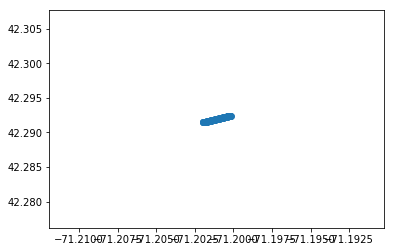

In [170]:
plt.scatter(mean_x, mean_y)

In [ ]:
def points_in_box(min_lon, max_lon, min_lat, max_lat):
    #Take the center point of this grid box
    lon = float((min_lon + max_lon)/2)
    lat = float((min_lat + max_lat)/2)
	
	#getting latitude and longitude columns
    begin_lat = exp["begin lat"]
    begin_long = exp["begin long"]
    end_lat = exp["end lat"]
    end_long = exp["end long"]
    #This list is going to hold tuples that will be the ordered pairs of all the nearby stops
    data_beg, data_end = [], []
    for x in range(0,len(begin_lat)) :
        data_beg.append(tuple([begin_lat[x], begin_long[x]]))
        data_end.append(tuple([end_lat[x], end_long[x]]))

    #We now have a list of ordered pairs that describe the locations of all the nearby stops
    #Next we have to determine if there are stops contained within the parameters of a given grid box
    #And, if so, count how many
    startsingrid = 0
    endsingrid = 0
    for y in range(0, len(data_beg)):
        if (data_beg[y][0]>= min_lat and data_beg[y][0]<=max_lat) and (data_beg[y][1]>= min_lon and data_beg[y][1]<=max_lon):
            startsingrid = 1 + startsingrid
        if (data_end[y][0]>= min_lat and data_end[y][0]<=max_lat) and (data_end[y][1]>= min_lon and data_end[y][1]<=max_lon):
            endsingrid = 1 + endsingrid

    #Only part that will need to be changed depending on our needs: What is printed/ returned at the end
    #print("Center of Grid: (" + str(lat) + ", " + str(lon) + ")" )
    print("Start Locations in this gridbox: "+ str(startsingrid)+ ", End Locations in this gridbox: "+ str(endsingrid))
#end of method